In [1]:
#aprox. time 00:02:56
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
accidents_df = pd.read_csv('../data/MA2_finished.csv', index_col='ID')

# conversion table states to regions --> https://www.kaggle.com/datasets/omer2040/usa-states-to-region
states_df = pd.read_csv('../data/states.csv')
states_df = states_df.rename(columns={'State': 'State Name', 'State Code': 'State'})
accidents_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Duration
ID,,,,,,,,,,,,,,,,,,,,,
3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,False,Night,Night,Day,Day,2016,2,0,6,1800.0
4,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,False,Night,Day,Day,Day,2016,2,0,7,1800.0
5,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,False,Day,Day,Day,Day,2016,2,0,7,1800.0
6,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,...,False,Day,Day,Day,Day,2016,2,0,7,1800.0
7,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,...,False,Day,Day,Day,Day,2016,2,0,7,1800.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7777757,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,...,False,Day,Day,Day,Day,2019,8,4,18,1716.0
7777758,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,...,False,Day,Day,Day,Day,2019,8,4,19,1613.0
7777759,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,...,False,Day,Day,Day,Day,2019,8,4,19,1708.0


In [3]:
#added three columns at the end for new features
merged_df = pd.merge(accidents_df, states_df, left_on='State', right_on='State', how='left')
states_df

,State Name,State,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [4]:
merged_df.index.name = 'ID'
merged_df = merged_df.rename(columns={'ID':'Severity'})
merged_df

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,County,...,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Duration,State Name,Region,Division
ID,,,,,,,,,,,,,,,,,,,,,
0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,...,Day,Day,2016,2,0,6,1800.0,Ohio,Midwest,East North Central
1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
3,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,Franklin,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
4,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,Montgomery,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051551,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,Riverside,...,Day,Day,2019,8,4,18,1716.0,California,West,Pacific
7051552,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,San Diego,...,Day,Day,2019,8,4,19,1613.0,California,West,Pacific
7051553,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,Orange,...,Day,Day,2019,8,4,19,1708.0,California,West,Pacific


In [5]:
merged_df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Duration',
       'State Name', 'Region', 'Division'],
      dtype='object')

In [6]:
merged_df.reset_index(inplace=True)
pivot_table = pd.pivot_table(merged_df, values='ID', index='Severity', columns='Weather_Condition', aggfunc='count', fill_value=0)
print(pivot_table)

Weather_Condition  Blowing Dust  Blowing Dust / Windy  Blowing Sand  \
Severity                                                              
1                             1                     8             0   
2                           169                   230             1   
3                            17                    19             1   
4                             0                     8             0   

Weather_Condition  Blowing Snow  Blowing Snow / Windy  Blowing Snow Nearby  \
Severity                                                                     
1                             0                     0                    0   
2                           551                   875                    1   
3                           129                    17                    0   
4                            39                    23                    0   

Weather_Condition   Clear  Cloudy  Cloudy / Windy  Drifting Snow  ...  \
Severity                       

In [7]:
merged_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Temperature(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year', 'Month', 'Day', 'Hour', 'Duration',
       'State Name', 'Region', 'Division'],
      dtype='object')

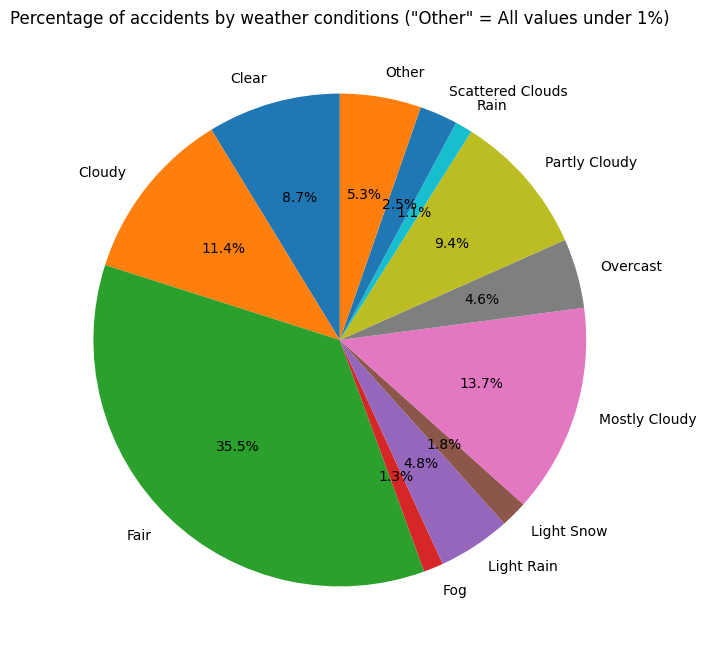

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

weather_condition_percentages = pivot_table.sum(axis=0) / pivot_table.sum().sum() * 100

# Grouping values <1% by "Other"

small_sections = weather_condition_percentages[weather_condition_percentages < 1]
weather_condition_percentages_grouped = weather_condition_percentages[weather_condition_percentages >= 1]
weather_condition_percentages_grouped['Other'] = small_sections.sum()

# Create pie chart
plt.figure(figsize=(12, 8))
weather_condition_percentages_grouped.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Percentage of accidents by weather conditions ("Other" = All values under 1%)')
plt.show()
#we can see that most of the accidents happen when there is the weather_condition: fair. this was expected. We still get a good overview of what
#weahterconditions could impact an accident

In [9]:
#set Id Column as Index
merged_df.set_index('ID')
merged_df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,City,...,Nautical_Twilight,Astronomical_Twilight,Year,Month,Day,Hour,Duration,State Name,Region,Division
0,0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.010,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,...,Day,Day,2016,2,0,6,1800.0,Ohio,Midwest,East North Central
1,1,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.010,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
2,2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.010,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
3,3,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,0.010,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,Westerville,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
4,4,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,0.000,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,Dayton,...,Day,Day,2016,2,0,7,1800.0,Ohio,Midwest,East North Central
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051551,7051551,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,0.543,At Market St - Accident.,Pomona Fwy E,Riverside,...,Day,Day,2019,8,4,18,1716.0,California,West,Pacific
7051552,7051552,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,0.338,At Camino Del Rio/Mission Center Rd - Accident.,I-8 W,San Diego,...,Day,Day,2019,8,4,19,1613.0,California,West,Pacific
7051553,7051553,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,0.561,At Glassell St/Grand Ave - Accident. in the ri...,Garden Grove Fwy,Orange,...,Day,Day,2019,8,4,19,1708.0,California,West,Pacific
7051554,7051554,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,San Diego Fwy S,Culver City,...,Day,Day,2019,8,4,19,1761.0,California,West,Pacific


In [10]:
merged_df.to_csv('../data/MA3_finished.csv')